In [251]:
import pandas as pd
import sweetviz as sv
from zipfile import ZipFile
import pandas as pd
import os, time
import shutil
import sys
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
import random

In [252]:
"""import tensorflow as tf
annotation_folder = "/dataset/"
if not os.path.exists(os.path.abspath(".") + annotation_folder):
    annotation_zip = tf.keras.utils.get_file(
        "train.tar.gz",
        cache_subdir=os.path.abspath("."),
        origin="http://diode-dataset.s3.amazonaws.com/train.tar.gz",
        extract=True,
    )"""

'import tensorflow as tf\nannotation_folder = "/dataset/"\nif not os.path.exists(os.path.abspath(".") + annotation_folder):\n    annotation_zip = tf.keras.utils.get_file(\n        "train.tar.gz",\n        cache_subdir=os.path.abspath("."),\n        origin="http://diode-dataset.s3.amazonaws.com/train.tar.gz",\n        extract=True,\n    )'

In [253]:
def get_dataframe_from_dataset(dataset_files_path):
    dataset_files = []
    for root, dirs, files in os.walk(dataset_files_path):
        for file in files:
            dataset_files.append(os.path.join(root, file))
    dataset_files.sort()
    df = pd.DataFrame({"image": [i_file for i_file in dataset_files if i_file.endswith(".png")],
             "depth": [d_file for d_file in dataset_files if d_file.endswith("_depth.npy")],
             "mask": [m_file for m_file in dataset_files if m_file.endswith("_depth_mask.npy")]})
    return df

                                             |          | [  0%]   00:00 -> (? left)


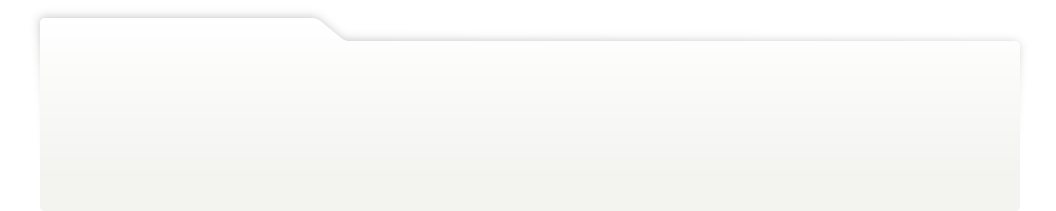
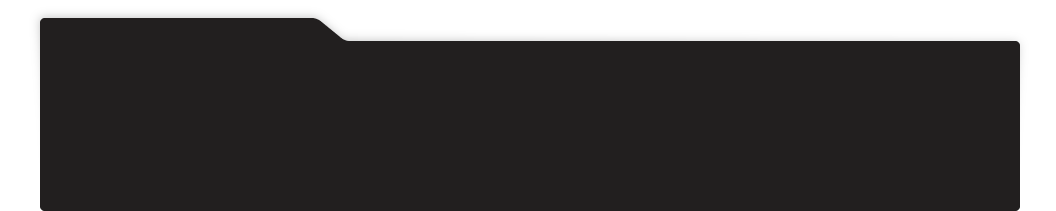
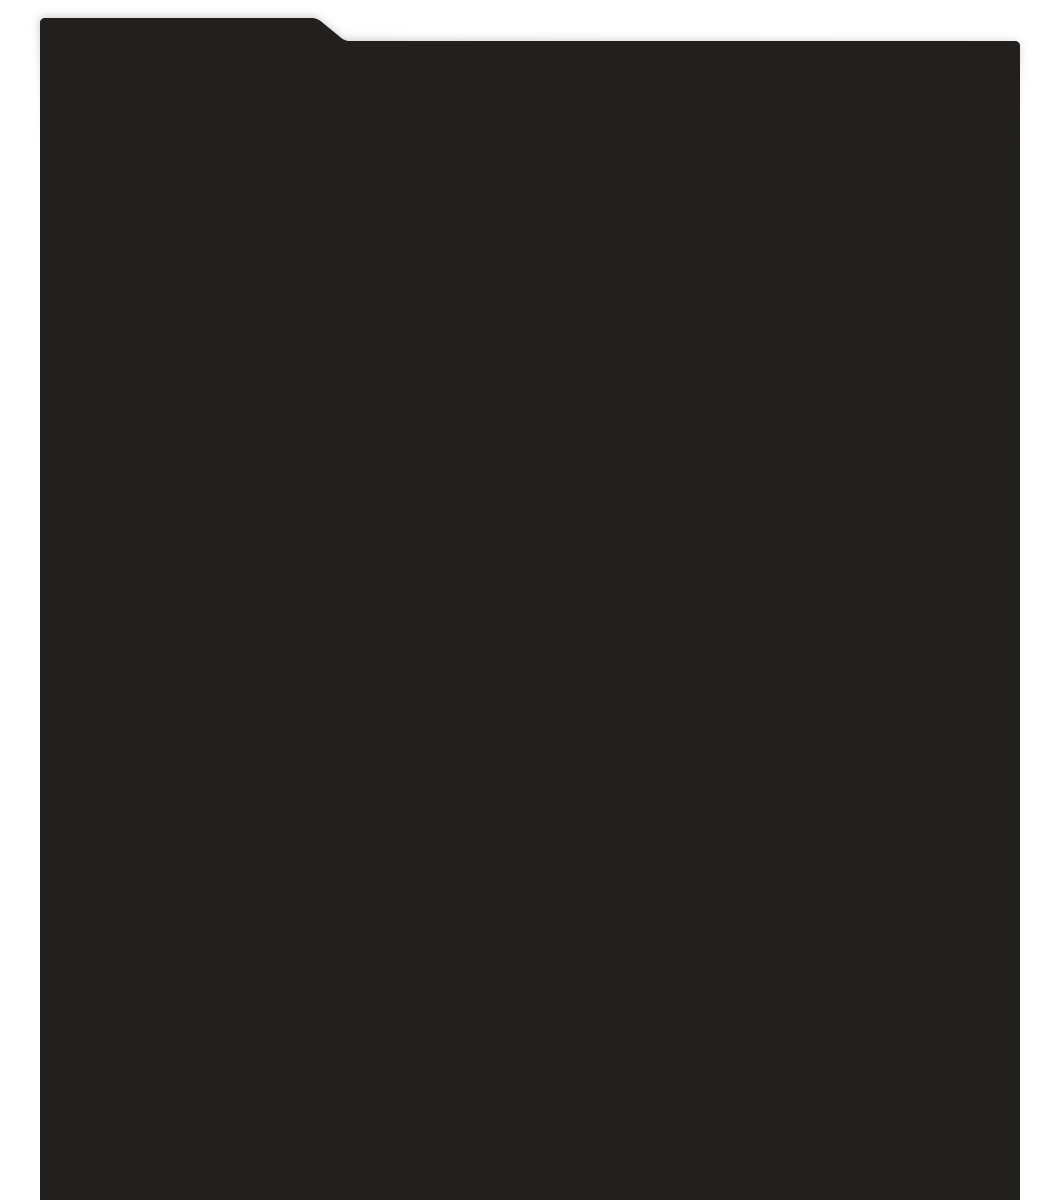
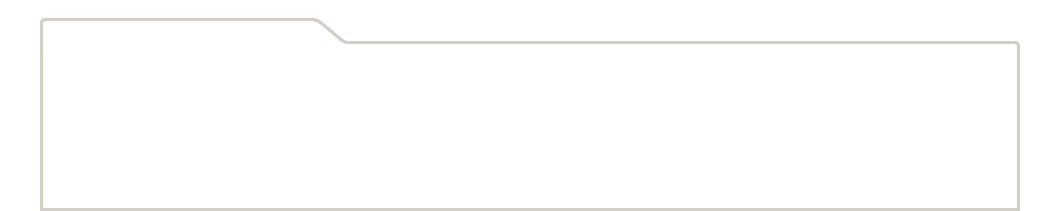
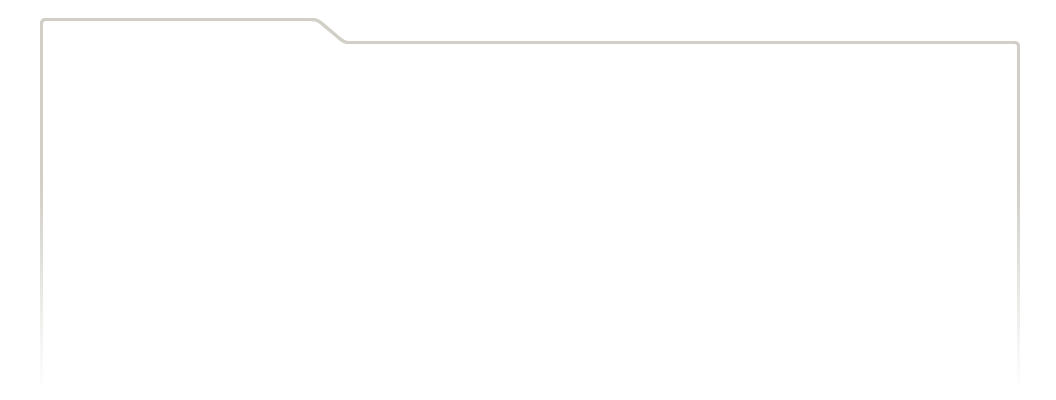
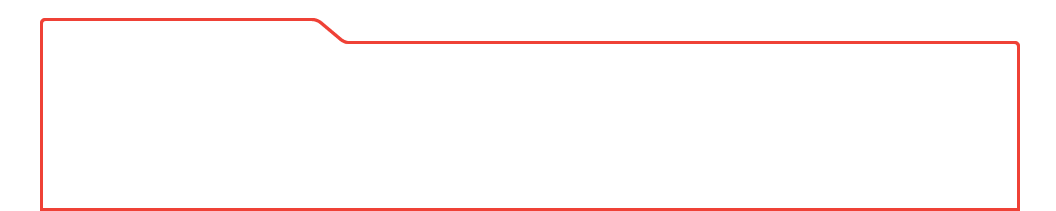
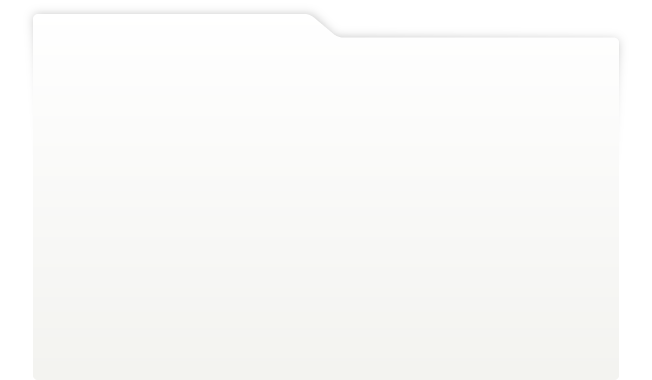
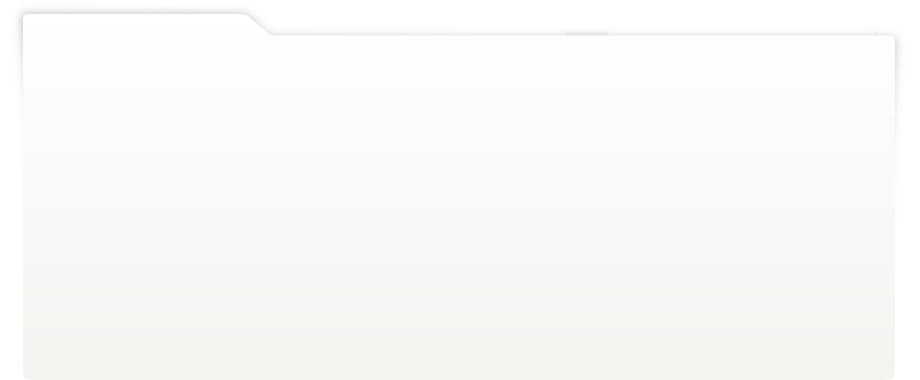
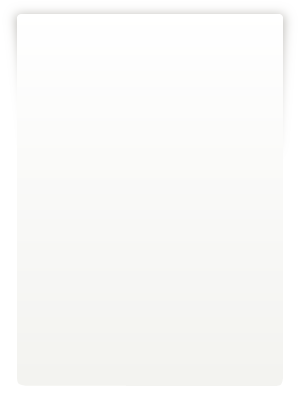
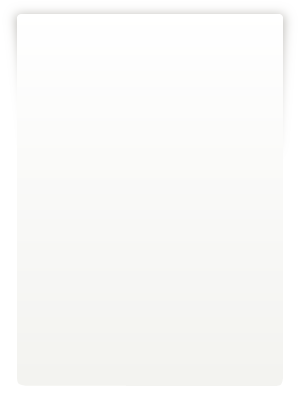
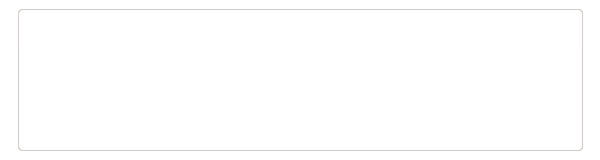
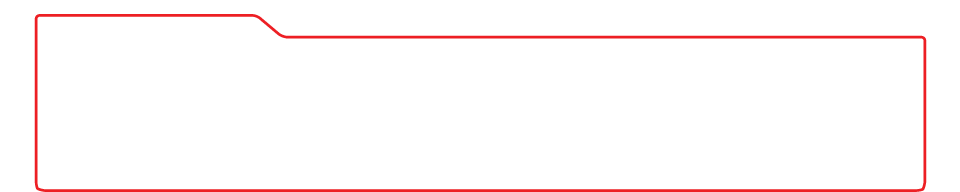
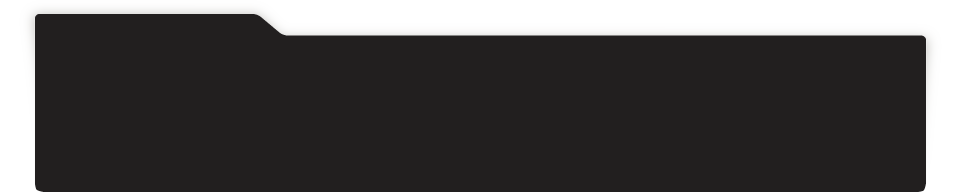
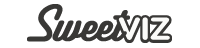
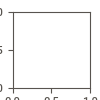
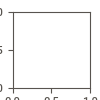

In [254]:
diode_df_indoors = get_dataframe_from_dataset('../monocular-depth-estimation-with-cnn/datasets/diode/indoors')
diode_df_indoors_report = sv.analyze(diode_df_indoors)
diode_df_indoors_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


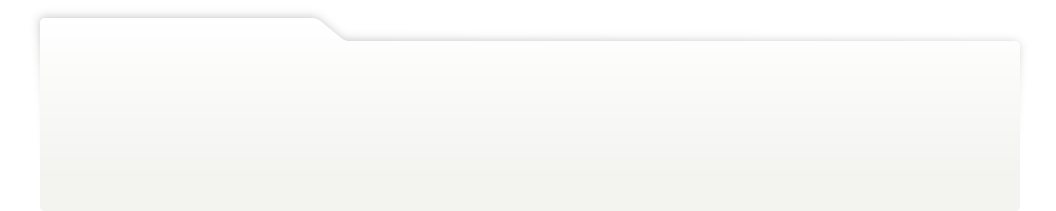
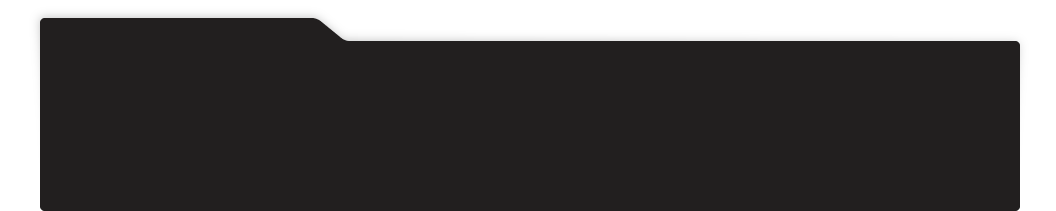
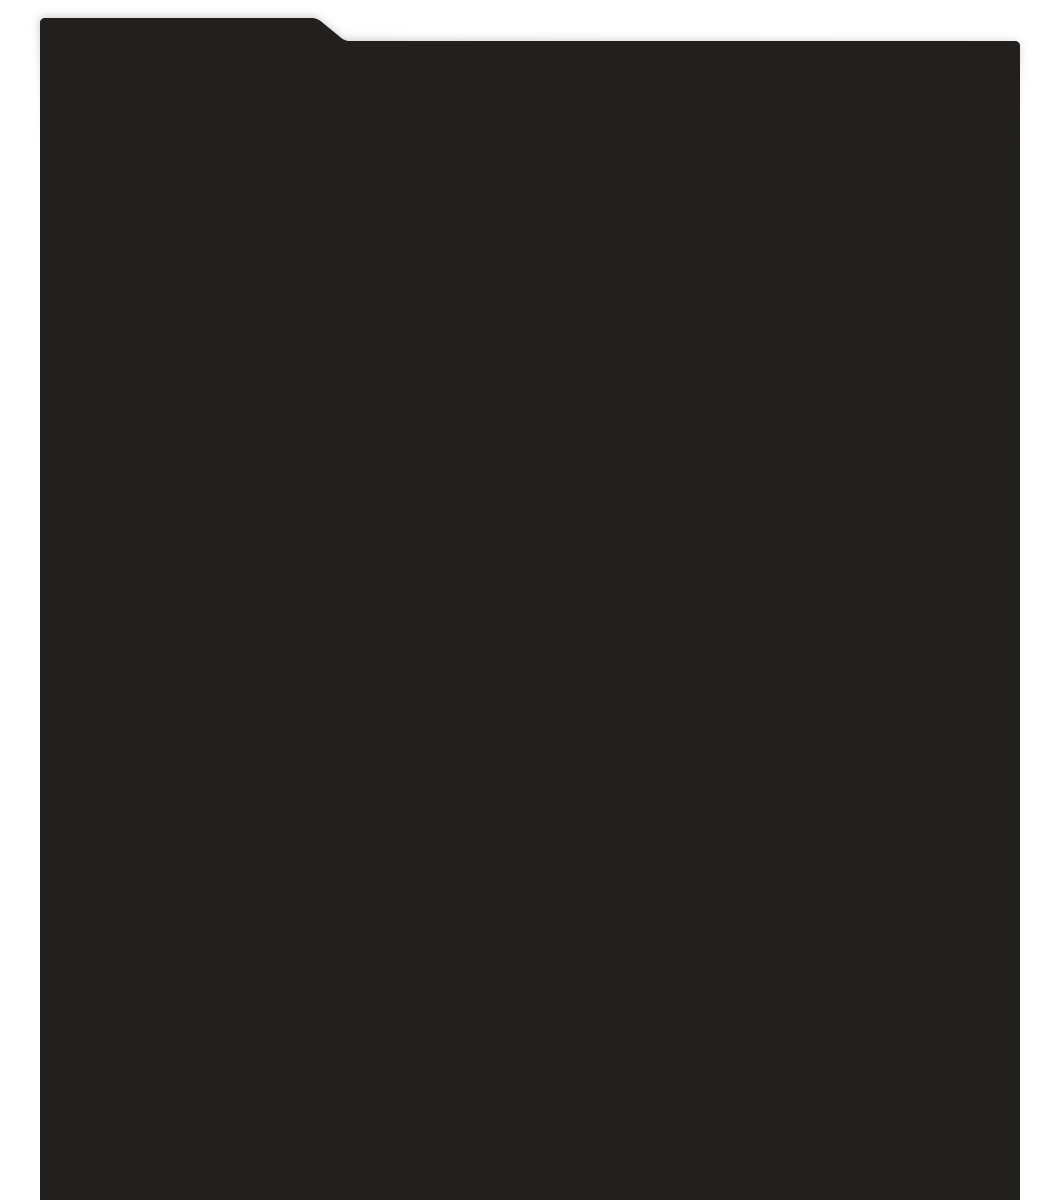
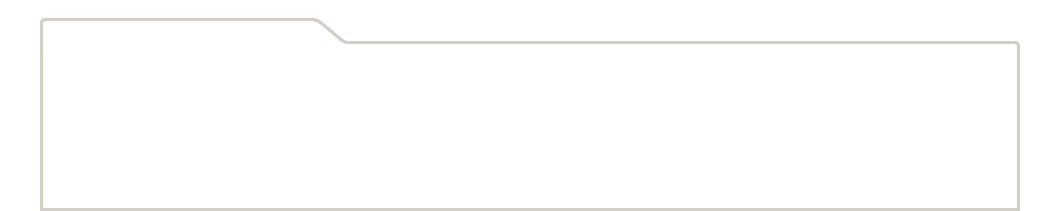
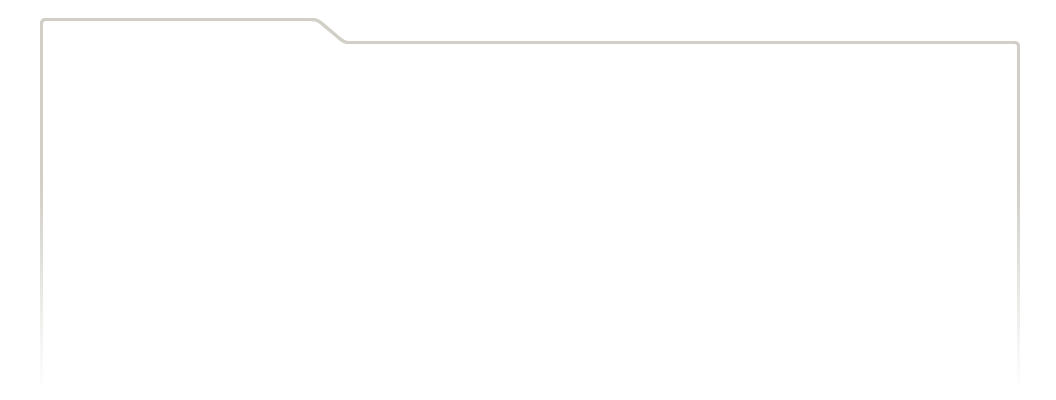
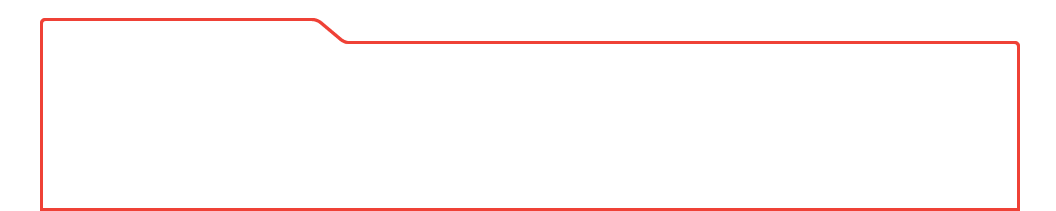
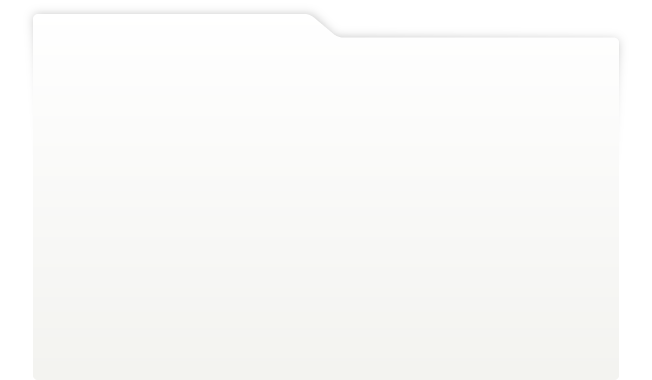
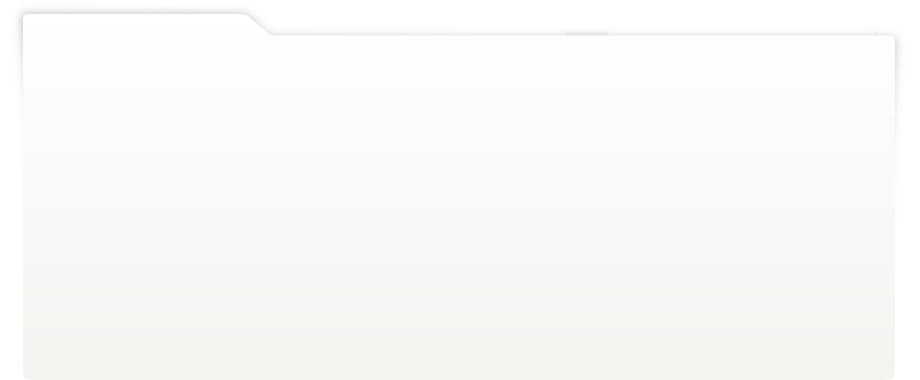
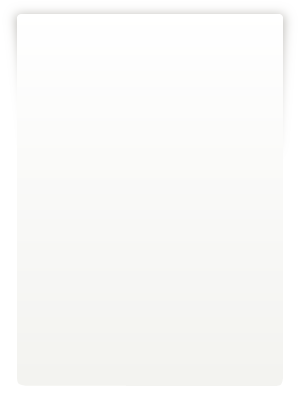
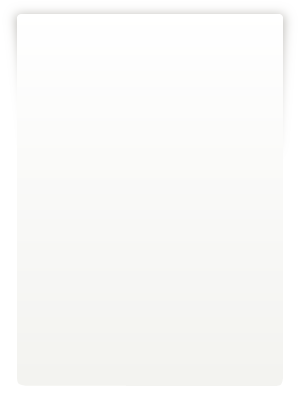
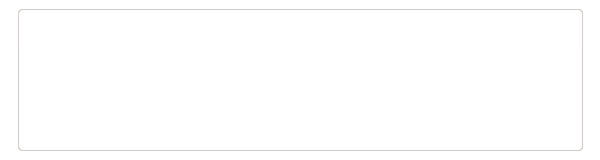
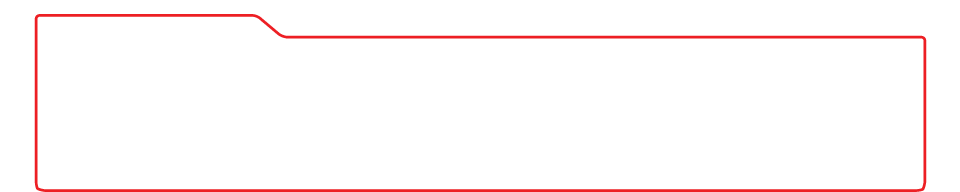
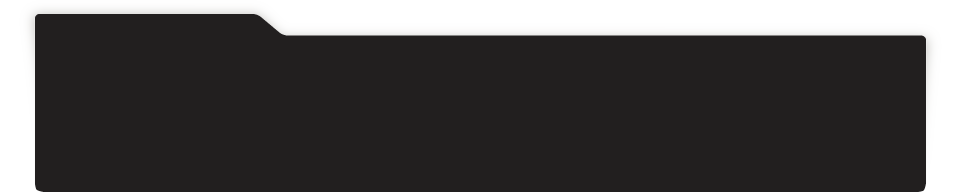
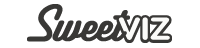
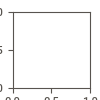
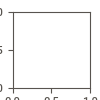

In [255]:
diode_df_outdoors = get_dataframe_from_dataset('../monocular-depth-estimation-with-cnn/datasets/diode/outdoors')
diode_df_outdoors_report = sv.analyze(diode_df_outdoors)
diode_df_outdoors_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


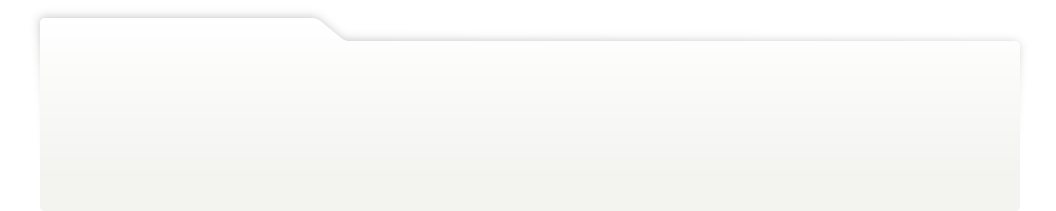
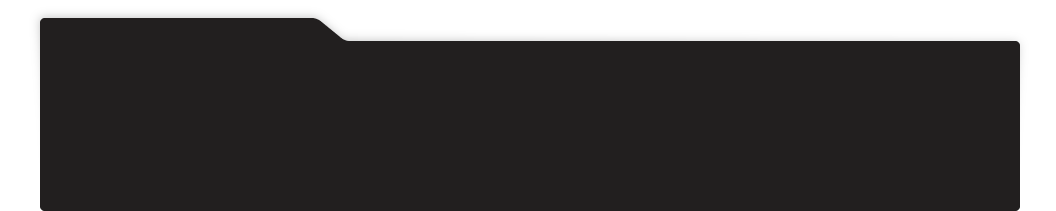
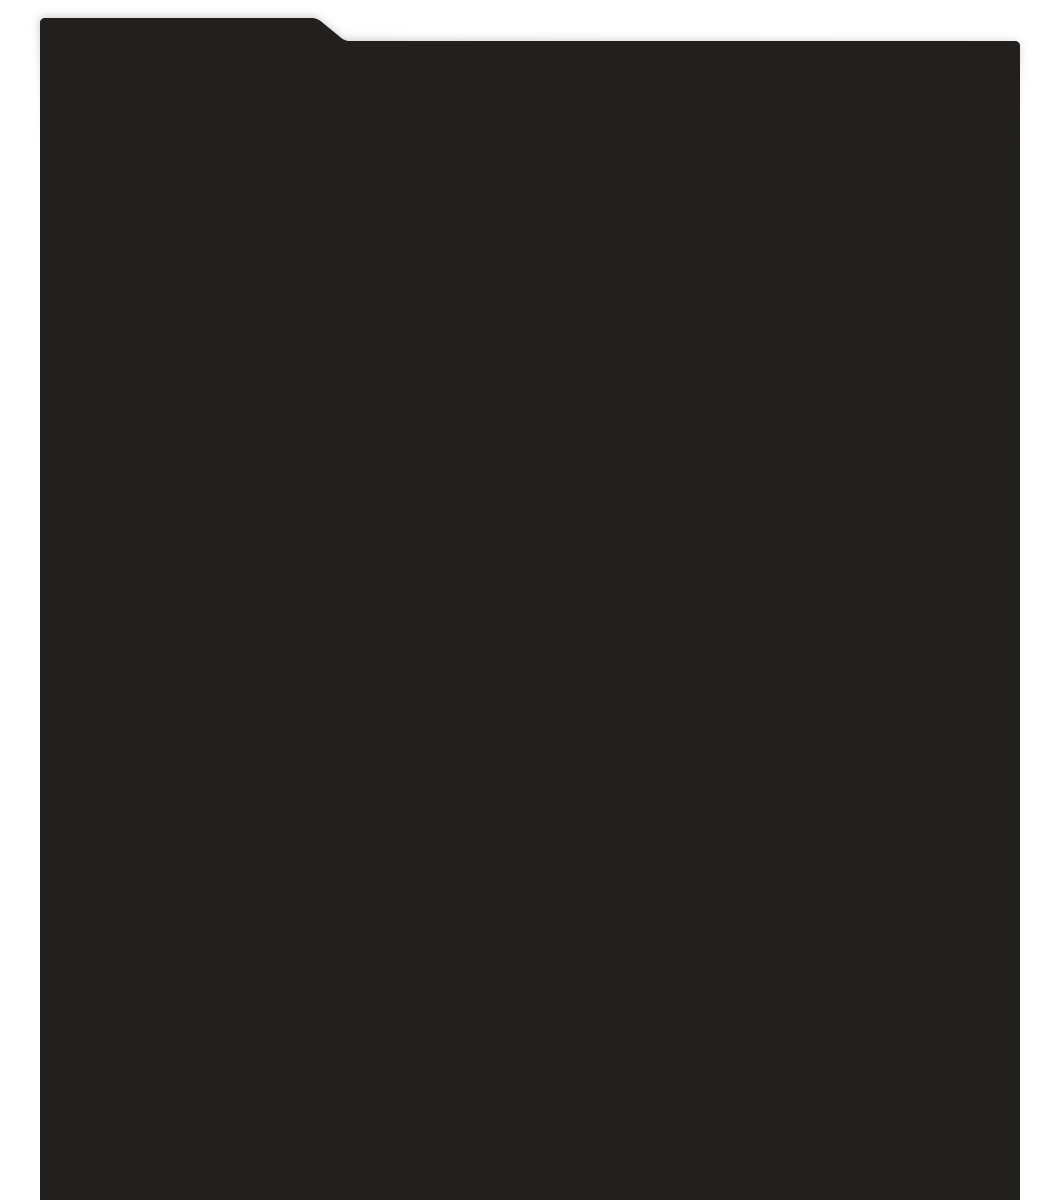
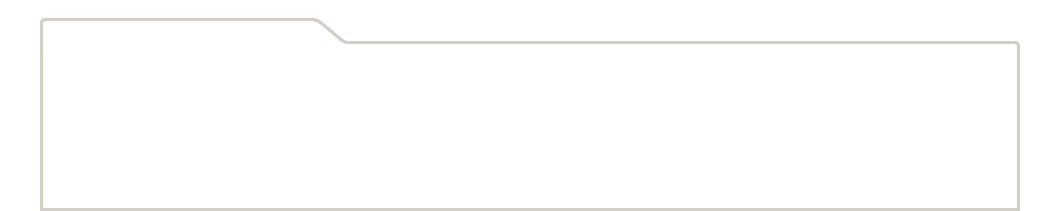
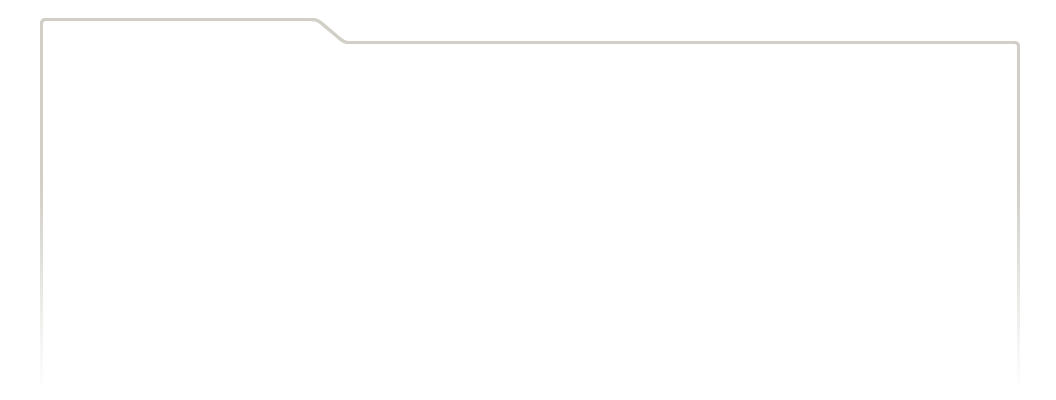
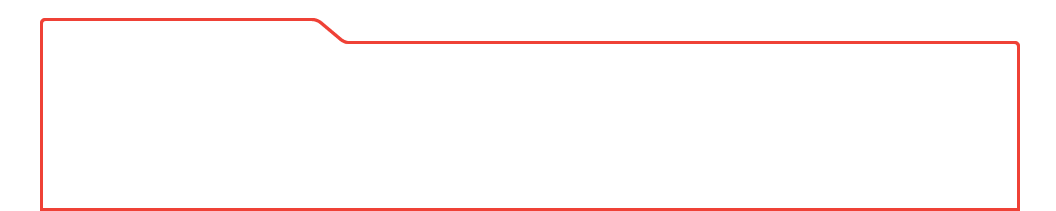
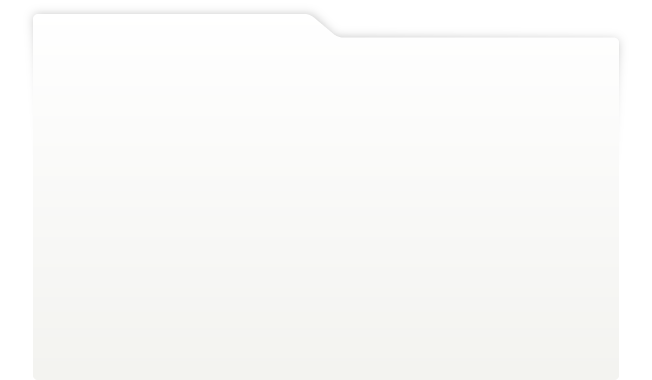
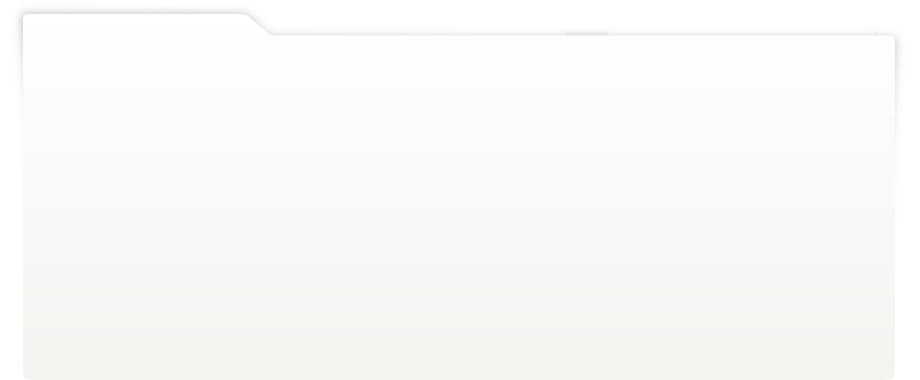
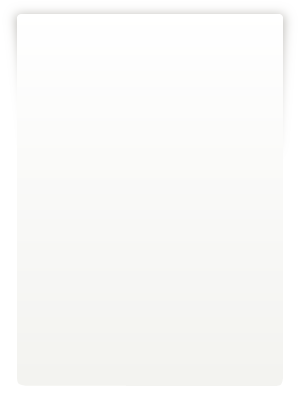
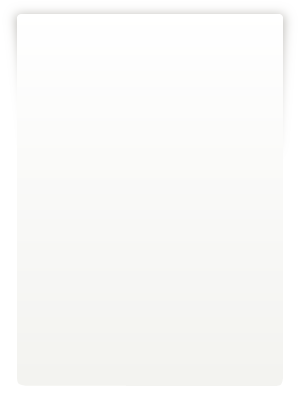
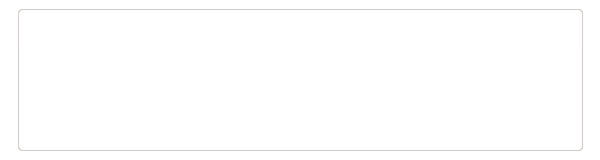
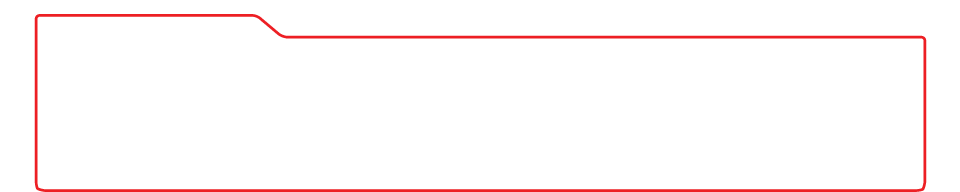
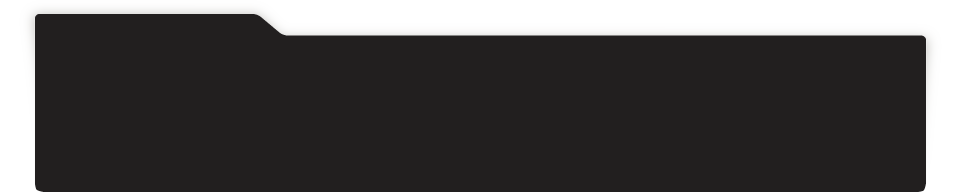
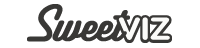
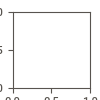
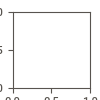

In [256]:
diode_df = pd.concat([diode_df_indoors, diode_df_outdoors], axis=0, ignore_index=True).copy()
diode_df_report = sv.analyze(diode_df)
diode_df_report.show_notebook()

In [257]:
diode_df.to_csv('datasets/diode/diode_df.csv')

In [258]:
seed_value = 43
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

import  tensorflow.python.keras.backend as kerasb
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
kerasb.set_session(sess)

In [259]:
split = 0.8
height, width = 240, 320

In [260]:
train_df = pd.read_csv('../monocular-depth-estimation-with-cnn/datasets/nyu_data/data/nyu2_train.csv', header=None)
display(train_df)

,0,1
0,data/nyu2_train/living_room_0038_out/37.jpg,data/nyu2_train/living_room_0038_out/37.png
1,data/nyu2_train/living_room_0038_out/115.jpg,data/nyu2_train/living_room_0038_out/115.png
2,data/nyu2_train/living_room_0038_out/6.jpg,data/nyu2_train/living_room_0038_out/6.png
3,data/nyu2_train/living_room_0038_out/49.jpg,data/nyu2_train/living_room_0038_out/49.png
4,data/nyu2_train/living_room_0038_out/152.jpg,data/nyu2_train/living_room_0038_out/152.png
...,...,...
50683,data/nyu2_train/dining_room_0031_out/441.jpg,data/nyu2_train/dining_room_0031_out/441.png
50684,data/nyu2_train/dining_room_0031_out/365.jpg,data/nyu2_train/dining_room_0031_out/365.png
50685,data/nyu2_train/dining_room_0031_out/447.jpg,data/nyu2_train/dining_room_0031_out/447.png
50686,data/nyu2_train/dining_room_0031_out/90.jpg,data/nyu2_train/dining_room_0031_out/90.png


In [261]:
train_df = train_df[:100]
display(train_df)

,0,1
0,data/nyu2_train/living_room_0038_out/37.jpg,data/nyu2_train/living_room_0038_out/37.png
1,data/nyu2_train/living_room_0038_out/115.jpg,data/nyu2_train/living_room_0038_out/115.png
2,data/nyu2_train/living_room_0038_out/6.jpg,data/nyu2_train/living_room_0038_out/6.png
3,data/nyu2_train/living_room_0038_out/49.jpg,data/nyu2_train/living_room_0038_out/49.png
4,data/nyu2_train/living_room_0038_out/152.jpg,data/nyu2_train/living_room_0038_out/152.png
...,...,...
95,data/nyu2_train/living_room_0038_out/76.jpg,data/nyu2_train/living_room_0038_out/76.png
96,data/nyu2_train/living_room_0038_out/124.jpg,data/nyu2_train/living_room_0038_out/124.png
97,data/nyu2_train/living_room_0038_out/128.jpg,data/nyu2_train/living_room_0038_out/128.png
98,data/nyu2_train/living_room_0038_out/170.jpg,data/nyu2_train/living_room_0038_out/170.png


In [227]:
test = pd.read_csv('../monocular-depth-estimation-with-cnn/datasets/nyu_data/data/nyu2_test.csv', header=None).rename(columns={0:'image', 1:'depth'})
display(test)

,image,depth
0,data/nyu2_test/00000_colors.png,data/nyu2_test/00000_depth.png
1,data/nyu2_test/00001_colors.png,data/nyu2_test/00001_depth.png
2,data/nyu2_test/00008_colors.png,data/nyu2_test/00008_depth.png
3,data/nyu2_test/00013_colors.png,data/nyu2_test/00013_depth.png
4,data/nyu2_test/00014_colors.png,data/nyu2_test/00014_depth.png
...,...,...
649,data/nyu2_test/01444_colors.png,data/nyu2_test/01444_depth.png
650,data/nyu2_test/01445_colors.png,data/nyu2_test/01445_depth.png
651,data/nyu2_test/01446_colors.png,data/nyu2_test/01446_depth.png
652,data/nyu2_test/01447_colors.png,data/nyu2_test/01447_depth.png


In [262]:
test = test[:20]
display(test)

,image,depth
0,data/nyu2_test/00000_colors.png,data/nyu2_test/00000_depth.png
1,data/nyu2_test/00001_colors.png,data/nyu2_test/00001_depth.png
2,data/nyu2_test/00008_colors.png,data/nyu2_test/00008_depth.png
3,data/nyu2_test/00013_colors.png,data/nyu2_test/00013_depth.png
4,data/nyu2_test/00014_colors.png,data/nyu2_test/00014_depth.png
5,data/nyu2_test/00015_colors.png,data/nyu2_test/00015_depth.png
6,data/nyu2_test/00016_colors.png,data/nyu2_test/00016_depth.png
7,data/nyu2_test/00017_colors.png,data/nyu2_test/00017_depth.png
8,data/nyu2_test/00020_colors.png,data/nyu2_test/00020_depth.png
9,data/nyu2_test/00027_colors.png,data/nyu2_test/00027_depth.png


In [266]:
train_df = train_df.sample(frac=1).reset_index(drop=True).rename(columns={0:'image', 1:'depth'})
display(train_df)

,image,depth
0,data/nyu2_train/living_room_0038_out/94.jpg,data/nyu2_train/living_room_0038_out/94.png
1,data/nyu2_train/living_room_0038_out/93.jpg,data/nyu2_train/living_room_0038_out/93.png
2,data/nyu2_train/living_room_0038_out/16.jpg,data/nyu2_train/living_room_0038_out/16.png
3,data/nyu2_train/living_room_0038_out/132.jpg,data/nyu2_train/living_room_0038_out/132.png
4,data/nyu2_train/living_room_0038_out/170.jpg,data/nyu2_train/living_room_0038_out/170.png
...,...,...
95,data/nyu2_train/living_room_0038_out/76.jpg,data/nyu2_train/living_room_0038_out/76.png
96,data/nyu2_train/living_room_0038_out/12.jpg,data/nyu2_train/living_room_0038_out/12.png
97,data/nyu2_train/living_room_0038_out/43.jpg,data/nyu2_train/living_room_0038_out/43.png
98,data/nyu2_train/living_room_0038_out/98.jpg,data/nyu2_train/living_room_0038_out/98.png


In [267]:
train_split = int(len(train_df)*split)
display(train_split)

80

In [231]:
train = train_df[:train_split]
display(train)

,image,depth
0,data/nyu2_train/living_room_0038_out/57.jpg,data/nyu2_train/living_room_0038_out/57.png
1,data/nyu2_train/living_room_0038_out/6.jpg,data/nyu2_train/living_room_0038_out/6.png
2,data/nyu2_train/living_room_0038_out/13.jpg,data/nyu2_train/living_room_0038_out/13.png
3,data/nyu2_train/living_room_0038_out/118.jpg,data/nyu2_train/living_room_0038_out/118.png
4,data/nyu2_train/living_room_0038_out/4.jpg,data/nyu2_train/living_room_0038_out/4.png
...,...,...
75,data/nyu2_train/living_room_0038_out/138.jpg,data/nyu2_train/living_room_0038_out/138.png
76,data/nyu2_train/living_room_0038_out/70.jpg,data/nyu2_train/living_room_0038_out/70.png
77,data/nyu2_train/living_room_0038_out/151.jpg,data/nyu2_train/living_room_0038_out/151.png
78,data/nyu2_train/living_room_0038_out/62.jpg,data/nyu2_train/living_room_0038_out/62.png


In [268]:
validation = train_df[train_split:]
display(validation)

,image,depth
80,data/nyu2_train/living_room_0038_out/71.jpg,data/nyu2_train/living_room_0038_out/71.png
81,data/nyu2_train/living_room_0038_out/114.jpg,data/nyu2_train/living_room_0038_out/114.png
82,data/nyu2_train/living_room_0038_out/100.jpg,data/nyu2_train/living_room_0038_out/100.png
83,data/nyu2_train/living_room_0038_out/56.jpg,data/nyu2_train/living_room_0038_out/56.png
84,data/nyu2_train/living_room_0038_out/103.jpg,data/nyu2_train/living_room_0038_out/103.png
85,data/nyu2_train/living_room_0038_out/149.jpg,data/nyu2_train/living_room_0038_out/149.png
86,data/nyu2_train/living_room_0038_out/147.jpg,data/nyu2_train/living_room_0038_out/147.png
87,data/nyu2_train/living_room_0038_out/126.jpg,data/nyu2_train/living_room_0038_out/126.png
88,data/nyu2_train/living_room_0038_out/163.jpg,data/nyu2_train/living_room_0038_out/163.png
89,data/nyu2_train/living_room_0038_out/82.jpg,data/nyu2_train/living_room_0038_out/82.png


In [269]:
len(train), len(validation)

(80, 20)

In [270]:
"datasets/nyu_data" + train_df['image'][0]

'datasets/nyu_datadata/nyu2_train/living_room_0038_out/94.jpg'

In [271]:
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, dataframe, batch_size, shuffle=False, dim=(320,240)):
    np.random.seed(43)
    self.df = dataframe
    self.height, self.width = dim
    self.shuffle = shuffle
    self.batch_size = batch_size
    self.ids = dataframe['image'].unique()
    self.imgtodpth = dataframe.set_index('image')['depth'].to_dict()
    self.on_epoch_end()

  def return_dataframe(self):
    return self.df

  def __len__(self):
    return len(self.df) // self.batch_size

  def on_epoch_end(self):
    self.indexes = np.arange(len(self.ids))
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __getitem__(self,index):
    idxs = self.indexes[index*self.batch_size : (index+1)*self.batch_size]
    flip = np.random.choice([True, False])
    query_imgs = [self.ids[idx] for idx in idxs]
    target_imgs = [self.imgtodpth[img] for img in query_imgs]
    processed_query_img = self._preprocess_image(query_imgs, flip)
    processed_depth_img = self._preprocess_depth(target_imgs, flip)
    return processed_query_img, processed_depth_img

  def _preprocess_image(self,images, flip):
    processed = []
    print(images)
    for img in images:
      # resize the image to 640x480
      print(img)
      resized_img = cv2.resize(cv2.imread("../monocular-depth-estimation-with-cnn/datasets/nyu_data/" + img),(self.height,self.width)).astype(np.float32)
      # normalize the image to {0,1}
      scaled_img = (resized_img - resized_img.min()) / (resized_img.max() - resized_img.min())
      # flip the image horizontally
      if flip:
        scaled_img = cv2.flip(scaled_img, 1)
      # finally append each image
      processed.append(scaled_img)
    return np.array(processed)

  def _preprocess_depth(self,images, flip):
    '''
    Resize, Normalize and randomly Augments the depth maps.
    '''
    # placeholder for storing the processed depth maps
    processed = []
    for img in images:
      # resize the depth map to 320x240
      resized_img = cv2.resize(cv2.cvtColor(cv2.imread("../monocular-depth-estimation-with-cnn/datasets/nyu_data/" + img), cv2.COLOR_BGR2GRAY),(320,240)).astype(np.float32)
      # normalize it to range {0,1}
      scaled_img = (resized_img - resized_img.min()) / (resized_img.max() - resized_img.min())
      # flip the image horizontally
      if flip:
        scaled_img = cv2.flip(scaled_img, 1)
      # add the color channel as cv2 grayscale image doesnt contain color channel but tensorflow expects it
      scaled_img = np.expand_dims(scaled_img, axis=-1)
      # finally append the image
      processed.append(scaled_img)
    return np.array(processed)

In [272]:
train_generator = DataGenerator(train, batch_size=2, shuffle=True, dim=(640,480))
train_generator.return_dataframe()

,image,depth
0,data/nyu2_train/living_room_0038_out/57.jpg,data/nyu2_train/living_room_0038_out/57.png
1,data/nyu2_train/living_room_0038_out/6.jpg,data/nyu2_train/living_room_0038_out/6.png
2,data/nyu2_train/living_room_0038_out/13.jpg,data/nyu2_train/living_room_0038_out/13.png
3,data/nyu2_train/living_room_0038_out/118.jpg,data/nyu2_train/living_room_0038_out/118.png
4,data/nyu2_train/living_room_0038_out/4.jpg,data/nyu2_train/living_room_0038_out/4.png
...,...,...
75,data/nyu2_train/living_room_0038_out/138.jpg,data/nyu2_train/living_room_0038_out/138.png
76,data/nyu2_train/living_room_0038_out/70.jpg,data/nyu2_train/living_room_0038_out/70.png
77,data/nyu2_train/living_room_0038_out/151.jpg,data/nyu2_train/living_room_0038_out/151.png
78,data/nyu2_train/living_room_0038_out/62.jpg,data/nyu2_train/living_room_0038_out/62.png


In [274]:
val_generator = DataGenerator(validation, batch_size=2, shuffle=False, dim=(640,480))
val_generator.return_dataframe()

,image,depth
80,data/nyu2_train/living_room_0038_out/71.jpg,data/nyu2_train/living_room_0038_out/71.png
81,data/nyu2_train/living_room_0038_out/114.jpg,data/nyu2_train/living_room_0038_out/114.png
82,data/nyu2_train/living_room_0038_out/100.jpg,data/nyu2_train/living_room_0038_out/100.png
83,data/nyu2_train/living_room_0038_out/56.jpg,data/nyu2_train/living_room_0038_out/56.png
84,data/nyu2_train/living_room_0038_out/103.jpg,data/nyu2_train/living_room_0038_out/103.png
85,data/nyu2_train/living_room_0038_out/149.jpg,data/nyu2_train/living_room_0038_out/149.png
86,data/nyu2_train/living_room_0038_out/147.jpg,data/nyu2_train/living_room_0038_out/147.png
87,data/nyu2_train/living_room_0038_out/126.jpg,data/nyu2_train/living_room_0038_out/126.png
88,data/nyu2_train/living_room_0038_out/163.jpg,data/nyu2_train/living_room_0038_out/163.png
89,data/nyu2_train/living_room_0038_out/82.jpg,data/nyu2_train/living_room_0038_out/82.png


In [275]:
test_generator = DataGenerator(test, batch_size=2, shuffle=False, dim=(640,480))
test_generator.return_dataframe()

,image,depth
0,data/nyu2_test/00000_colors.png,data/nyu2_test/00000_depth.png
1,data/nyu2_test/00001_colors.png,data/nyu2_test/00001_depth.png
2,data/nyu2_test/00008_colors.png,data/nyu2_test/00008_depth.png
3,data/nyu2_test/00013_colors.png,data/nyu2_test/00013_depth.png
4,data/nyu2_test/00014_colors.png,data/nyu2_test/00014_depth.png
5,data/nyu2_test/00015_colors.png,data/nyu2_test/00015_depth.png
6,data/nyu2_test/00016_colors.png,data/nyu2_test/00016_depth.png
7,data/nyu2_test/00017_colors.png,data/nyu2_test/00017_depth.png
8,data/nyu2_test/00020_colors.png,data/nyu2_test/00020_depth.png
9,data/nyu2_test/00027_colors.png,data/nyu2_test/00027_depth.png


In [276]:
print(len(train_generator), len(val_generator), len(test_generator))

40 10 10


In [277]:
images, depths = next(iter(val_generator))
print(images.shape, depths.shape)

['data/nyu2_train/living_room_0038_out/71.jpg', 'data/nyu2_train/living_room_0038_out/114.jpg']
data/nyu2_train/living_room_0038_out/71.jpg
data/nyu2_train/living_room_0038_out/114.jpg
(2, 480, 640, 3) (2, 240, 320, 1)


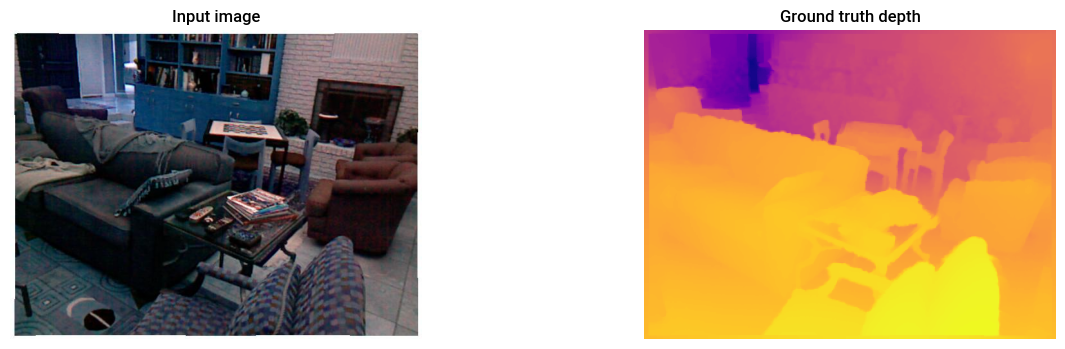

In [278]:
cmap = "plasma_r"
plt.figure(figsize=(15,9))
for i in range(0,2,2):
  image = images[i]
  depth = depths[i].squeeze(-1)
  plt.subplot(221+i)
  plt.axis('off')
  plt.imshow(image)
  plt.title('Input image')
  plt.subplot(222+i)
  plt.axis('off')
  plt.imshow(depth,cmap=plt.get_cmap(cmap))
  plt.title('Ground truth depth')

In [279]:
# Model
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, concatenate, Concatenate, Input
from tensorflow.keras import Model

def upsampling(input_tensor, n_filters, concat_layer):
  # Bilinear 2x upsampling layer
  x = UpSampling2D(size=(2,2), interpolation='bilinear')(input_tensor)
  # concatenation with encoder block
  x = concatenate([x,concat_layer])
  # decreasing the depth filters by half
  x = Conv2D(filters=n_filters, kernel_size=(3,3), padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(filters=n_filters, kernel_size=(3,3), padding='same')(x)
  x = BatchNormalization()(x)
  return x

# Layer name of encoders to be concatenated
names = ['pool3_pool', 'pool2_pool', 'pool1','conv1/relu']
# Transfer learning approach without the classification head
encoder = DenseNet169(include_top=False, weights='imagenet', input_shape=(480,640,3))
# Model build
inputs = encoder.input
x = encoder.output
# decoder blocks linked with corresponding encoder blocks
bneck = Conv2D(filters=1664, kernel_size=(1,1), padding='same')(x)
x = LeakyReLU(alpha=0.2)(bneck)
x = upsampling(bneck, 832, encoder.get_layer(names[0]).output)
x = LeakyReLU(alpha=0.2)(x)
x = upsampling(x, 416, encoder.get_layer(names[1]).output)
x = LeakyReLU(alpha=0.2)(x)
x = upsampling(x, 208, encoder.get_layer(names[2]).output)
x = LeakyReLU(alpha=0.2)(x)
x = upsampling(x, 104, encoder.get_layer(names[3]).output)
x = Conv2D(filters=1, kernel_size=(3,3), padding='same')(x)

In [280]:
model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 480, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 486, 646, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 240, 320, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                           

In [281]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K
import tensorflow_addons as tfa

def loss_function(y_true, y_pred):

  #Cosine distance loss
  l_depth = K.mean(K.abs(y_pred - y_true), axis=-1)

  # edge loss for sharp edges
  dy_true, dx_true = tf.image.image_gradients(y_true)
  dy_pred, dx_pred = tf.image.image_gradients(y_pred)
  l_edges = K.mean(K.abs(dy_pred - dy_true) + K.abs(dx_pred - dx_true), axis=-1)

  # structural similarity loss
  l_ssim = K.clip((1 - tf.image.ssim(y_true, y_pred, 1.0)) * 0.5, 0, 1)

  # weightage
  w1, w2, w3 = 1.0, 1.0, 0.1
  return (w1 * l_ssim) + (w2 * K.mean(l_edges)) + (w3 * K.mean(l_depth))



#optimizer
opt = tfa.optimizers.AdamW(learning_rate=0.0001, weight_decay=1e-6,amsgrad=True)

In [282]:

# accuracy function
def accuracy_function(y_true, y_pred):
  return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

# save model frequently for later use.
checkpoint = tf.keras.callbacks.ModelCheckpoint("../monocular-depth-estimation-with-cnn/datasets/nyu_data/", save_best_only=True, verbose=1)
# Learning rate scheduler
def polynomial_decay(epoch):
  max_epochs = 10
  base_lr =  0.0001
  power = 1.0
  lr = base_lr * (1 - (epoch / float(max_epochs))) ** power
  return lr

callbacks = [LearningRateScheduler(polynomial_decay, verbose=1), checkpoint]

In [283]:
for layer in encoder.layers:
  layer.trainable = True
  print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
model.compile(optimizer=opt, loss=loss_function, metrics=[accuracy_function])
history = model.fit(train_generator, validation_data=val_generator, epochs=2, callbacks=callbacks)

['data/nyu2_train/living_room_0038_out/98.jpg', 'data/nyu2_train/living_room_0038_out/94.jpg']
data/nyu2_train/living_room_0038_out/98.jpg
data/nyu2_train/living_room_0038_out/94.jpg

Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/2
['data/nyu2_train/living_room_0038_out/168.jpg', 'data/nyu2_train/living_room_0038_out/91.jpg']
data/nyu2_train/living_room_0038_out/168.jpg
data/nyu2_train/living_room_0038_out/91.jpg
['data/nyu2_train/living_room_0038_out/56.jpg', 'data/nyu2_train/living_room_0038_out/31.jpg']
data/nyu2_train/living_room_0038_out/56.jpg
data/nyu2_train/living_room_0038_out/31.jpg


2022-02-18 15:46:22.900166: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 752025600 exceeds 10% of free system memory.
2022-02-18 15:46:22.900881: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 752025600 exceeds 10% of free system memory.


 1/40 [..............................] - ETA: 24:07 - loss: 0.7635 - accuracy_function: 0.2952['data/nyu2_train/living_room_0038_out/113.jpg', 'data/nyu2_train/living_room_0038_out/76.jpg']
data/nyu2_train/living_room_0038_out/113.jpg
data/nyu2_train/living_room_0038_out/76.jpg


2022-02-18 15:46:41.774253: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 752025600 exceeds 10% of free system memory.
2022-02-18 15:46:41.775676: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 752025600 exceeds 10% of free system memory.


 2/40 [>.............................] - ETA: 11:58 - loss: 0.7549 - accuracy_function: 0.2975['data/nyu2_train/living_room_0038_out/98.jpg', 'data/nyu2_train/living_room_0038_out/94.jpg']
data/nyu2_train/living_room_0038_out/98.jpg
data/nyu2_train/living_room_0038_out/94.jpg


2022-02-18 15:46:59.896822: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 752025600 exceeds 10% of free system memory.


 3/40 [=>............................] - ETA: 11:37 - loss: 0.7170 - accuracy_function: 0.3680['data/nyu2_train/living_room_0038_out/95.jpg', 'data/nyu2_train/living_room_0038_out/138.jpg']
data/nyu2_train/living_room_0038_out/95.jpg
data/nyu2_train/living_room_0038_out/138.jpg
